In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_bokeh
# pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv",parse_dates=['date'])
data.set_index('date', inplace=True)

In [4]:
plt.figure()
plt.rcParams.update({'font.size': 22}) # must set in top
plt.rcParams.update({'figure.figsize': (24,10)}) # must set in top
plt.rcParams["axes.formatter.limits"] = (-5, 12)

<Figure size 432x288 with 0 Axes>

In [5]:
data.columns.size

66

In [6]:
interesting_colums = ["new_cases", "new_cases_smoothed", "new_cases_smoothed_per_million",
                      "new_deaths", "new_deaths_smoothed", "new_deaths_smoothed_per_million",
                      "total_cases_per_million","total_cases", "total_deaths","total_deaths_per_million", "mortality_rate"]

data['mortality_rate'] = data['total_deaths_per_million'] / \
    data['total_cases_per_million']

slovakia = data[data['iso_code'] == "SVK"][interesting_colums]


In [7]:
slovakia.columns

Index(['new_cases', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
       'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million',
       'total_cases_per_million', 'total_cases', 'total_deaths',
       'total_deaths_per_million', 'mortality_rate'],
      dtype='object')

In [8]:
slovakia['new_deaths'].sum()


19161.0

In [9]:
slovakia.tail()

,new_cases,new_cases_smoothed,new_cases_smoothed_per_million,new_deaths,new_deaths_smoothed,new_deaths_smoothed_per_million,total_cases_per_million,total_cases,total_deaths,total_deaths_per_million,mortality_rate
date,,,,,,,,,,,
2022-03-18,10931.0,10680.429,1959.974,33.0,32.286,5.925,428160.469,2333162.0,19073.0,3500.102,0.008175
2022-03-19,10895.0,10635.286,1951.690,20.0,30.286,5.558,430159.820,2344057.0,19093.0,3503.772,0.008145
2022-03-20,7644.0,10505.286,1927.834,17.0,27.429,5.033,431562.576,2351701.0,19110.0,3506.892,0.008126
2022-03-21,3863.0,10402.429,1908.958,23.0,26.143,4.797,432271.479,2355564.0,19133.0,3511.112,0.008122
2022-03-22,11338.0,10217.857,1875.087,28.0,26.000,4.771,434352.124,2366902.0,19161.0,3516.251,0.008095


<AxesSubplot:title={'center':'Slovensko - Počet prípadov ochorenia'}, xlabel='date'>

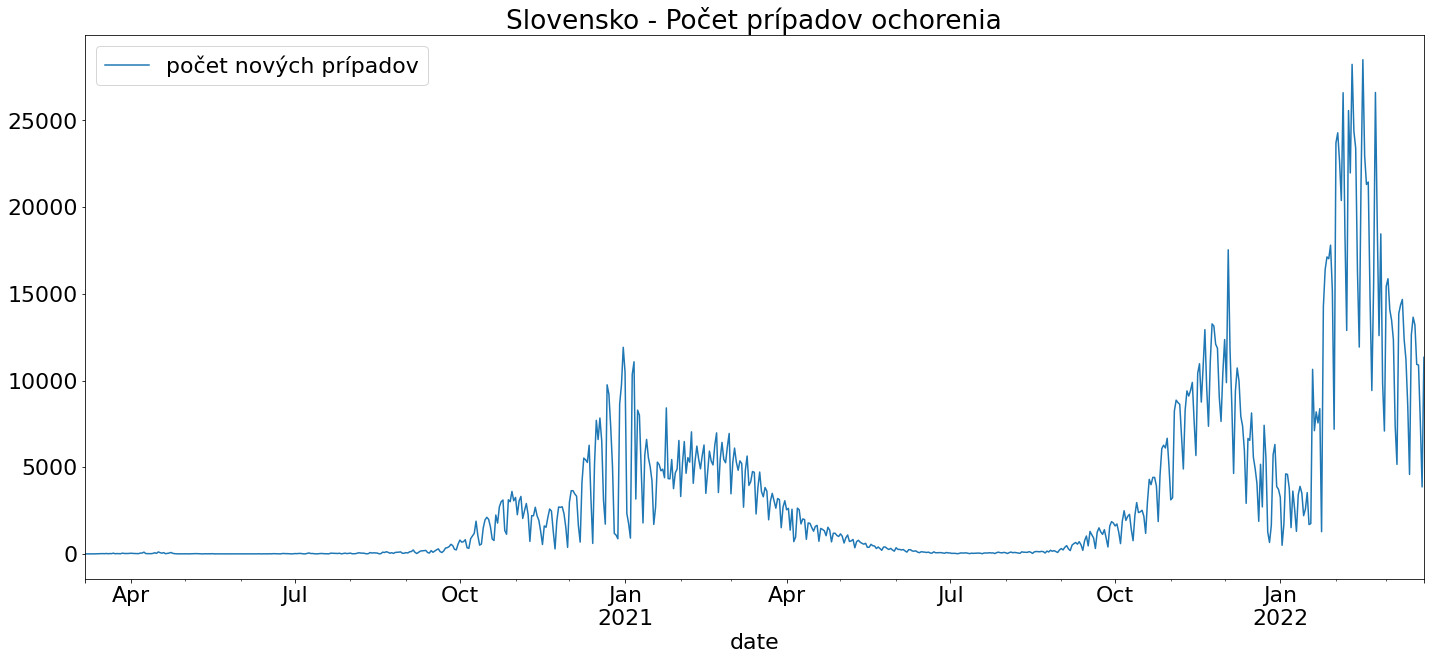

In [10]:
slovakia.plot(y=['new_cases'],
              title="Slovensko - Počet prípadov ochorenia",
              label=["počet nových prípadov"])


## Vrchol prvej vlny

In [11]:
slovakia[(slovakia.index >= '2020-1-1' ) & (slovakia.index <= '2020-05-01')]['new_cases_smoothed'].idxmax()

Timestamp('2020-04-19 00:00:00')

## Vyhladený graf s vyznačenými udalosťami

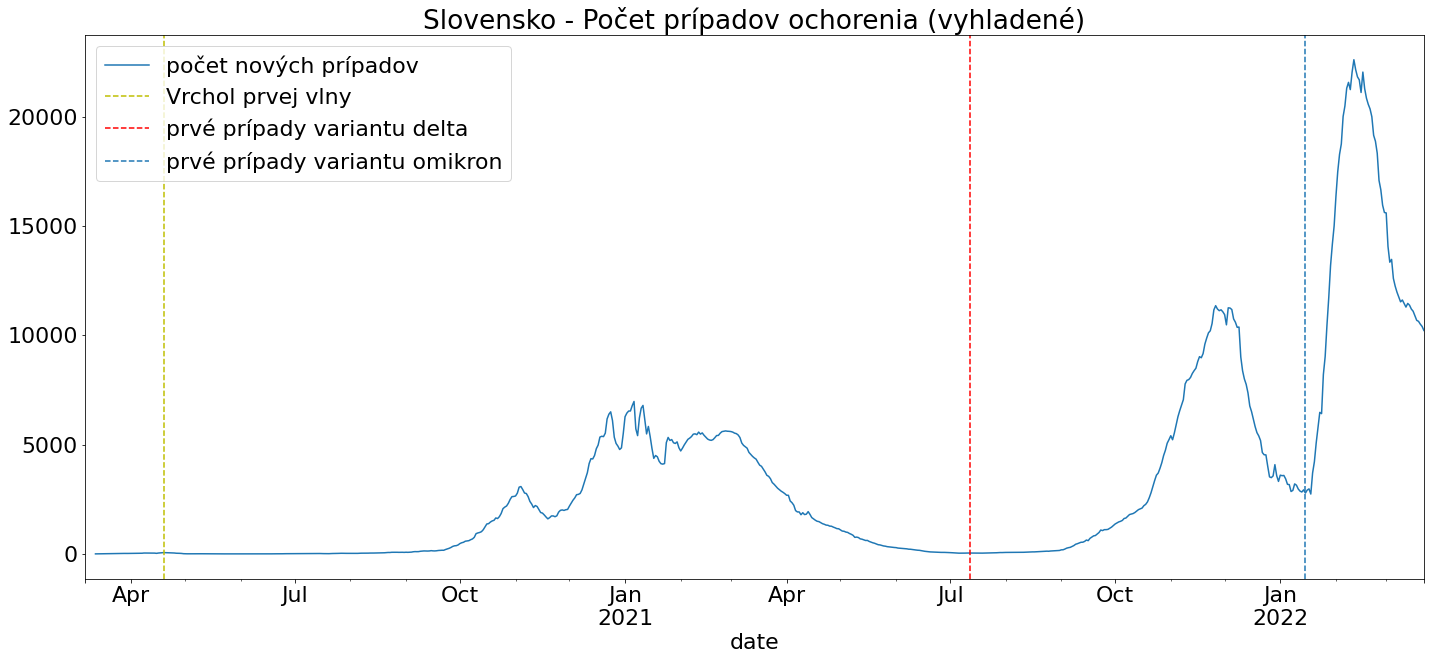

In [12]:
slovakia.plot(y=['new_cases_smoothed'],
              title="Slovensko - Počet prípadov ochorenia (vyhladené)",
              label=["počet nových prípadov"])

plt.axvline(pd.to_datetime('2020-04-19'), color='y', linestyle='--', label='Vrchol prvej vlny')
plt.axvline(pd.to_datetime('2021-07-12'), color='r', linestyle='--', label='prvé prípady variantu delta')
plt.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')
plt.legend(loc='upper left')



<AxesSubplot:title={'center':'Slovensko - počet nových prípadov a celkových úmrtí'}, xlabel='date'>

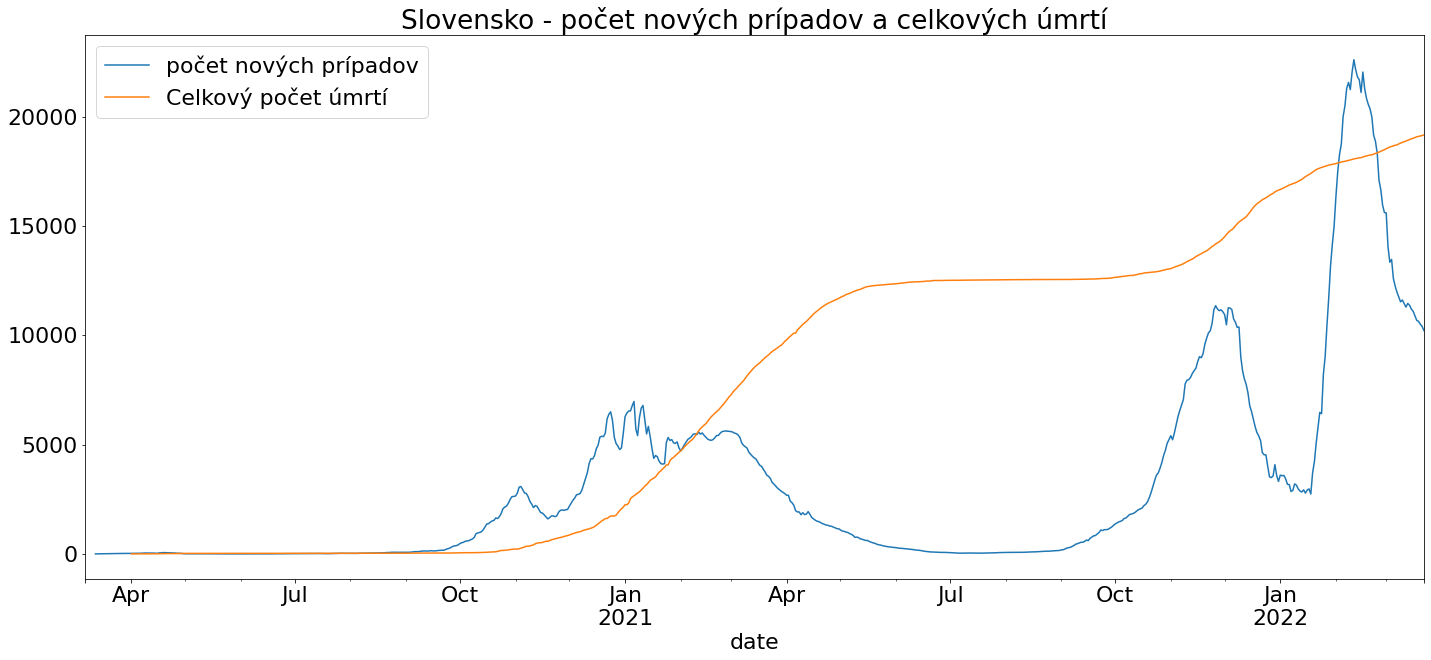

In [13]:
slovakia.plot(y=['new_cases_smoothed', 'total_deaths'],
              title="Slovensko - počet nových prípadov a celkových úmrtí",
              label=["počet nových prípadov", "Celkový počet úmrtí"], subplots=False)


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

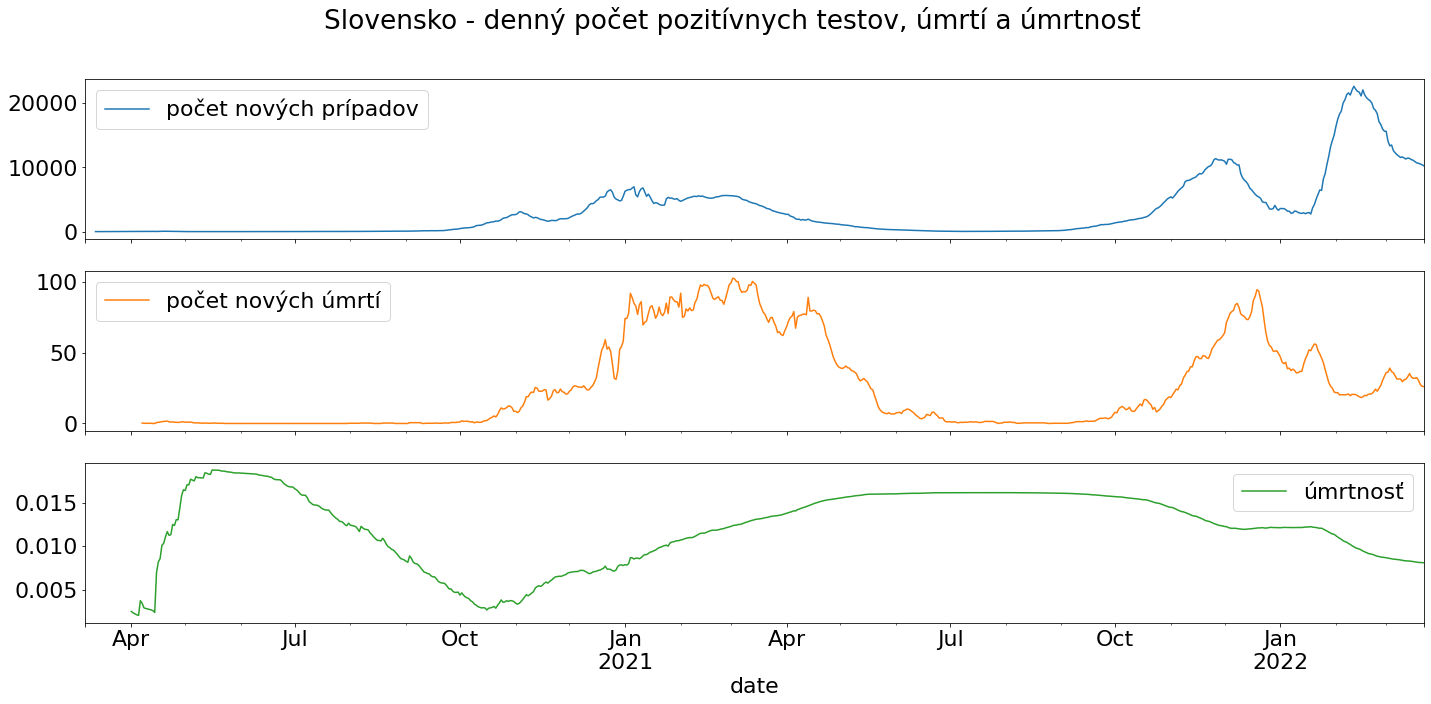

In [14]:
slovakia.plot(y=['new_cases_smoothed', 'new_deaths_smoothed', 'mortality_rate'],
              title="Slovensko - denný počet pozitívnych testov, úmrtí a úmrtnosť",
              label=["počet nových prípadov",
                     "počet nových úmrtí", 'úmrtnosť'],
              subplots=True)



<AxesSubplot:title={'center':'Slovensko - počet prípadov a úmrtí'}, xlabel='date'>

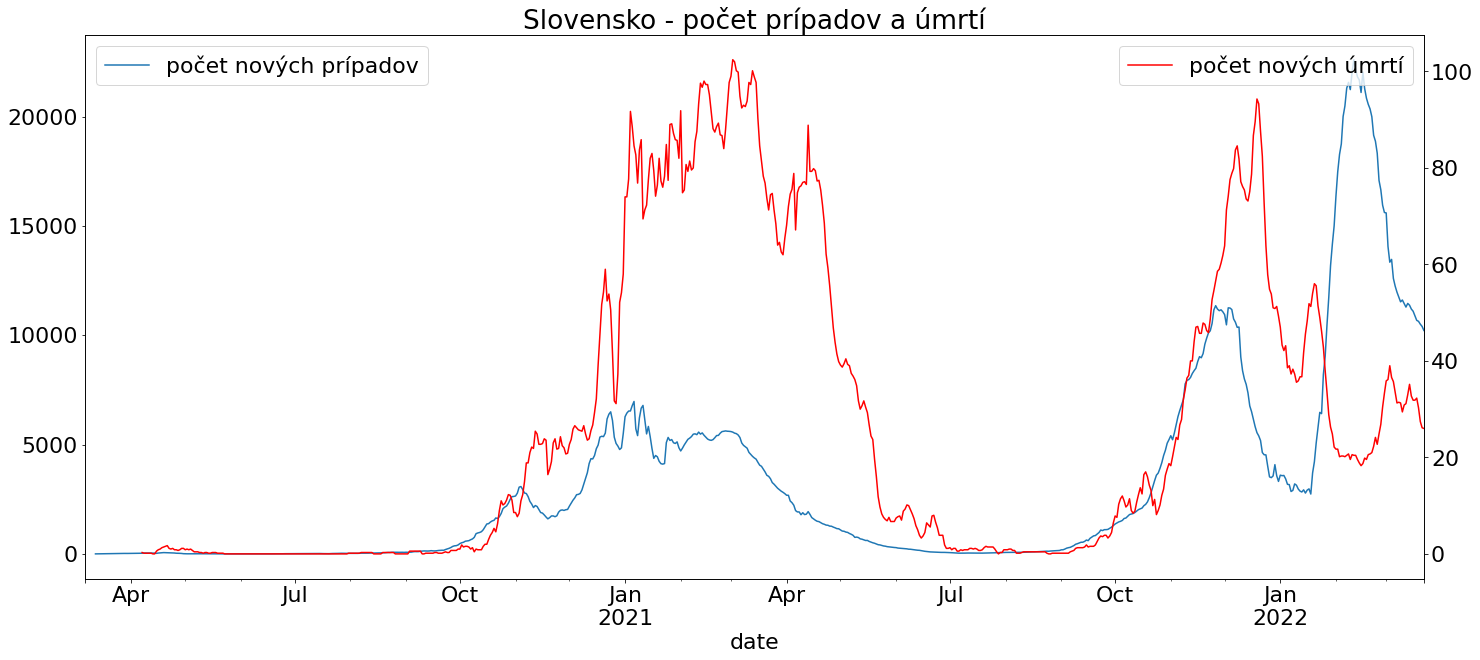

In [15]:
ax1 = slovakia.plot(y=['new_cases_smoothed'], label=["počet nových prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
slovakia.plot(y=['new_deaths_smoothed'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", label=["počet nových úmrtí"])


## Maximálná úmrtnosť

In [16]:
slovakia['mortality_rate'].max()

0.018753056770152782

## Celková úmrtnosť

In [17]:

slovakia['total_deaths'].max() / slovakia['total_cases'].max()*100

0.8095392204662466

## Kumulatívny počet prípadov a úmrtnosť

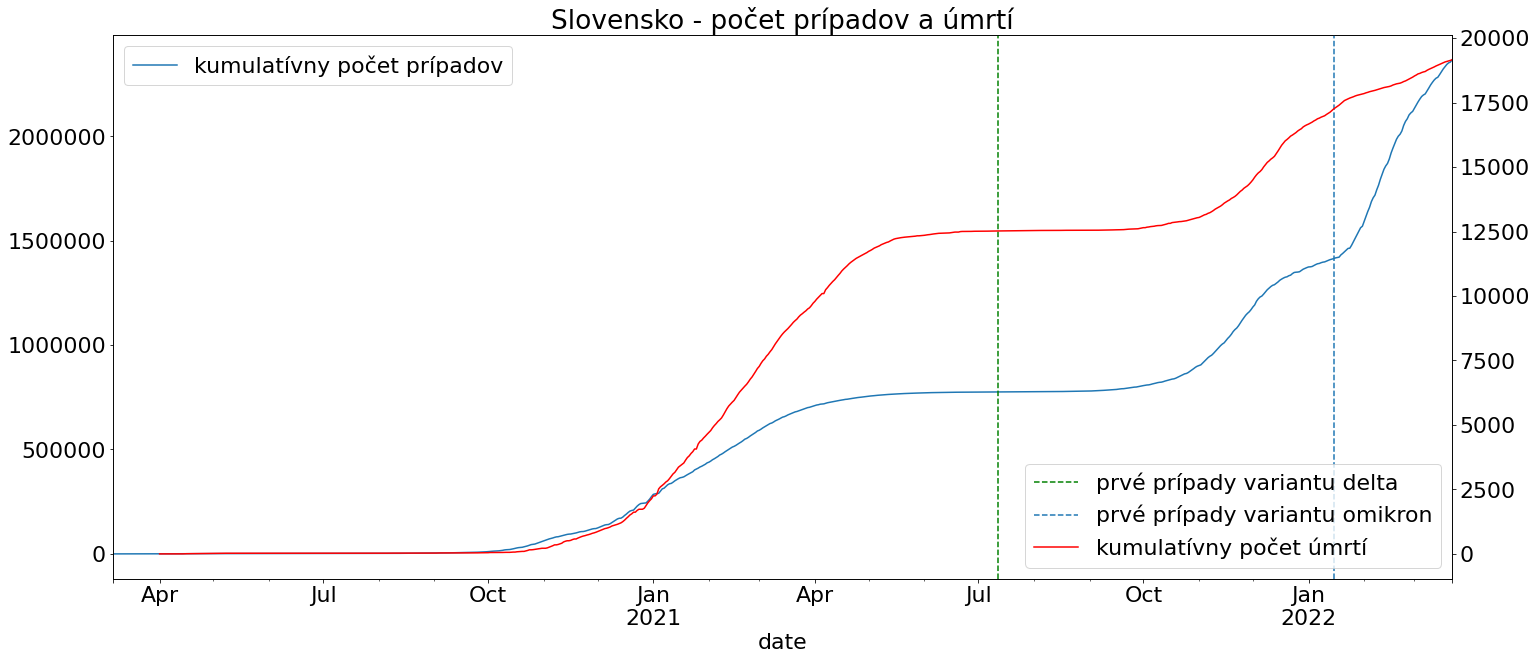

In [18]:
ax1 = slovakia.plot(y=['total_cases'], label=["kumulatívny počet prípadov"])
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.axvline(pd.to_datetime('2021-07-12'), color='g', linestyle='--', label='prvé prípady variantu delta')
ax2.axvline(pd.to_datetime('2022-01-15'), linestyle='--', label='prvé prípady variantu omikron')


slovakia.plot(y=['total_deaths'], color="red", ax=ax2,
              title="Slovensko - počet prípadov a úmrtí", 
              label=["kumulatívny počet úmrtí"],
              ).legend(loc='lower right')


# Porovnanie rokov

In [113]:
years = ["2020","2021","2022"]

years_df = pd.DataFrame(index=pd.date_range('2020-01-01','2020-12-31', freq='1D').strftime('%m-%d'))
for year in years:
    tmp = slovakia[(slovakia.index >= year +'-01-01' ) & (slovakia.index <= year +'-12-31')][interesting_colums].add_prefix(year + "_")
    tmp.index = tmp.index.strftime('%m-%d')
    years_df = pd.merge(years_df,tmp,left_index= True, right_index= True,how="left")


In [108]:
years_df

,2020_new_cases,2020_new_cases_smoothed,2020_new_cases_smoothed_per_million,2020_new_deaths,2020_new_deaths_smoothed,2020_new_deaths_smoothed_per_million,2020_total_cases_per_million,2020_total_cases,2020_total_deaths,2020_total_deaths_per_million,...,2022_new_cases_smoothed,2022_new_cases_smoothed_per_million,2022_new_deaths,2022_new_deaths_smoothed,2022_new_deaths_smoothed_per_million,2022_total_cases_per_million,2022_total_cases,2022_total_deaths,2022_total_deaths_per_million,2022_mortality_rate
01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3601.143,660.849,30.0,47.000,8.625,252208.828,1374354.0,16665.0,3058.208,0.012126
01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3577.714,656.549,36.0,43.286,7.943,252299.849,1374850.0,16701.0,3064.814,0.012148
01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3587.000,658.253,39.0,42.143,7.734,252613.469,1376559.0,16740.0,3071.971,0.012161
01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3430.000,629.442,48.0,43.143,7.917,253460.555,1381175.0,16788.0,3080.780,0.012155
01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3183.143,584.141,36.0,38.571,7.078,254301.952,1385760.0,16824.0,3087.386,0.012141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11-27,2716.0,2011.143,369.066,22.0,22.429,4.116,21493.521,117124.0,771.0,141.487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-28,2314.0,1988.571,364.924,27.0,22.000,4.037,21918.165,119438.0,798.0,146.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-29,1533.0,2021.000,370.875,18.0,20.714,3.801,22199.487,120971.0,816.0,149.745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-30,376.0,2033.571,373.182,23.0,20.857,3.828,22268.487,121347.0,839.0,153.966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
years_df[[ year + "_new_cases_smoothed" for year in years]].plot_bokeh( 
    figsize=(1200,600),
    number_format="1",
    title="Porovnanie rokov - Počet prípadov na Slovensku"
    )

Figure(id='2860', ...)

In [119]:
years_df[[ year + "_new_deaths_smoothed" for year in years]].plot_bokeh( 
    figsize=(1200,600),
    number_format="1",
    title="Porovnanie rokov - Počet úmrtí na Slovensku"
    )

Figure(id='3146', ...)